# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [278]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the csv into a pandas dataframe and display the first rows
bb = pd.read_csv("../assets/billboard.csv")
bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
# Display dataframe dimensions and data types
print(bb.shape)

(317, 83)


In [280]:
# Display number of null values per column
bb.apply(lambda x: x.isnull().sum())

year                 0
artist.inverted      0
track                0
time                 0
genre                0
date.entered         0
date.peaked          0
x1st.week            0
x2nd.week            5
x3rd.week           10
x4th.week           17
x5th.week           25
x6th.week           37
x7th.week           48
x8th.week           57
x9th.week           64
x10th.week          73
x11th.week          81
x12th.week          95
x13th.week         107
x14th.week         113
x15th.week         120
x16th.week         135
x17th.week         140
x18th.week         151
x19th.week         161
x20th.week         171
x21st.week         252
x22nd.week         262
x23rd.week         269
                  ... 
x47th.week         312
x48th.week         313
x49th.week         313
x50th.week         313
x51st.week         313
x52nd.week         313
x53rd.week         313
x54th.week         315
x55th.week         315
x56th.week         315
x57th.week         315
x58th.week         315
x59th.week 

In [281]:
# Display each column's type
print(bb.dtypes)

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data contains information about songs that reached billboard 100 in 2000 (presumably in the US although this information is not provided with the dataset).

For each song, we have information about the artist, the song duration, the genre, when it entered and when it peaked the billboard, and finally the billboard rank week after week from the date it entered to the last week before it exited.

Due to the way the data is structured (billboard rank per week stored in columns), there is a high number of empty rows: once a song is no longer in billboard, all subsequent columns will have an empty value.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [282]:
# Rename columns
bb = bb.rename(columns={"artist.inverted":"artist","date.entered":"entered","date.peaked":"peaked"})
dict_weeks = {bb.columns[i]:str(i-6) for i in range(7,83)}
bb = bb.rename(columns=dict_weeks)
bb.head()

,year,artist,track,time,genre,entered,peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
# Change type for dates
bb['entered']=pd.to_datetime(bb['entered'])
bb['peaked']=pd.to_datetime(bb['peaked'])
bb['time']="0:"+bb['time']
bb['time']=pd.to_timedelta(bb['time'],unit='s')
bb.head()

,year,artist,track,time,genre,entered,peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,00:03:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",00:04:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,00:04:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,00:03:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),00:03:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# Check if some columns are totally empty
bb.apply(lambda x:sum(x.notnull()))

year       317
artist     317
track      317
time       317
genre      317
entered    317
peaked     317
1          317
2          312
3          307
4          300
5          292
6          280
7          269
8          260
9          253
10         244
11         236
12         222
13         210
14         204
15         197
16         182
17         177
18         166
19         156
20         146
21          65
22          55
23          48
          ... 
47           5
48           4
49           4
50           4
51           4
52           4
53           4
54           2
55           2
56           2
57           2
58           2
59           2
60           2
61           2
62           2
63           2
64           2
65           1
66           0
67           0
68           0
69           0
70           0
71           0
72           0
73           0
74           0
75           0
76           0
dtype: int64

In [285]:
# Drop empty columns
bb.dropna(how="all",axis=1,inplace=True)
bb.shape

(317, 72)

In [ ]:
# Impute missing data
# At this stage it feels like this won't be required

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [286]:
# Melt the dataframe
bb_melted = pd.melt(bb,id_vars=bb.columns[:7].tolist(),var_name="week",value_name="ranking")
bb_melted['week'] = bb_melted['week'].astype(int)
# Ensure that we now have fewer columnns and more rows
print(bb_melted.shape)
print(bb_melted[bb_melted["track"]=="Maria, Maria"].head(3))
print(bb_melted[bb_melted["track"]=="Maria, Maria"].tail(3))

(20605, 9)
     year   artist         track     time genre    entered     peaked  week  \
1    2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     1   
318  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     2   
635  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     3   

     ranking  
1       15.0  
318      8.0  
635      6.0  
       year   artist         track     time genre    entered     peaked  week  \
19655  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08    63   
19972  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08    64   
20289  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08    65   

       ranking  
19655      NaN  
19972      NaN  
20289      NaN  


In [287]:
# Perform additional cleanup by removing all ranking with no value
bb_melted.dropna(subset=['ranking'],inplace=True)
bb_melted['ranking'] = bb_melted['ranking'].astype(int)
# Ensure that we still have the same number of columns but less rows
print(bb_melted.shape)
print(bb_melted[bb_melted["track"]=="Maria, Maria"].head())
print(bb_melted[bb_melted["track"]=="Maria, Maria"].tail())

(5307, 9)
      year   artist         track     time genre    entered     peaked  week  \
1     2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     1   
318   2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     2   
635   2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     3   
952   2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     4   
1269  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08     5   

      ranking  
1          15  
318         8  
635         6  
952         5  
1269        2  
      year   artist         track     time genre    entered     peaked  week  \
6658  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08    22   
6975  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08    23   
7292  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08    24   
7609  2000  Santana  Maria, Maria 00:04:18  Rock 2000-02-12 2000-04-08    25   
7926  2000  S

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

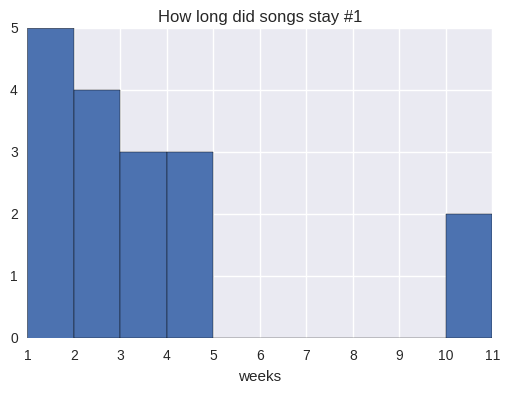

track                                  time    
Amazed                                 00:04:25     2
Be With You                            00:03:36     3
Bent                                   00:04:12     1
Come On Over Baby (All I Want Is You)  00:03:38     4
Doesn't Really Matter                  00:04:17     3
Everything You Want                    00:04:01     1
I Knew I Loved You                     00:04:07     4
Incomplete                             00:03:52     2
Independent Women Part I               00:03:38    11
It's Gonna Be Me                       00:03:10     2
Maria, Maria                           00:04:18    10
Music                                  00:03:45     4
Say My Name                            00:04:31     3
Thank God I Found You                  00:04:14     1
Try Again                              00:04:03     1
What A Girl Wants                      00:03:18     2
With Arms Wide Open                    00:03:52     1
Name: week, dtype: int64

In [419]:
# Check how long songs stayed number 1
pivot = bb_melted[bb_melted["ranking"]==1].pivot_table(index=["track","time"],values="week",aggfunc=len)
pivot.hist()
plt.title("How long did songs stay #1")
plt.xlabel("weeks")
plt.xticks(list(np.arange(1,12)))
plt.xlim((1,11))
plt.show()
pivot

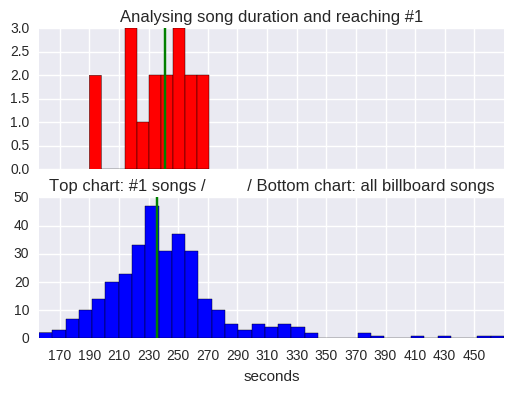

In [415]:
# Convert pivot result into a dataframe
df = pd.DataFrame(pivot)
df.reset_index(inplace=True)

# Analyse song duration
f, axes = plt.subplots(2,1,sharex=True)

df.time.dt.seconds.hist(color="r",ax=axes[0])
axes[0].axvline(np.median(df.time.dt.seconds),color='g')
axes[0].set_title("Analysing song duration and reaching #1")
axes[1].set_title("Top chart: #1 songs /         / Bottom chart: all billboard songs")
plt.xlabel("seconds")
plt.xticks(list(np.arange(150,470,20)))
bb.time.dt.seconds.hist(color="b",ax=axes[1],bins=35)
axes[1].axvline(np.median(bb.time.dt.seconds),color='g')

plt.show()

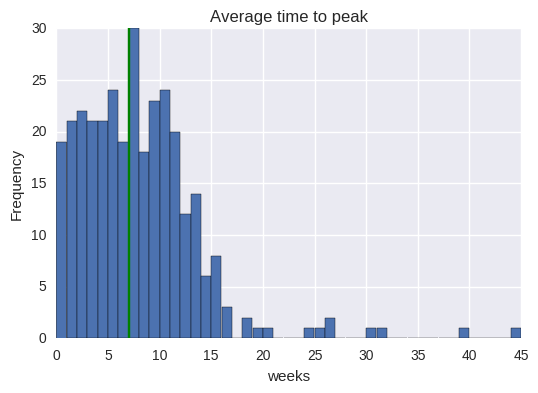

In [340]:
# Time to peak (in weeks)
peak_data = bb['peaked']-bb['entered']
(peak_data.dt.days/7).plot(kind='hist',bins=45)
plt.axvline(np.median(peak_data.dt.days/7),color="g")
plt.title("Average time to peak")
plt.xlabel("weeks")
plt.show()

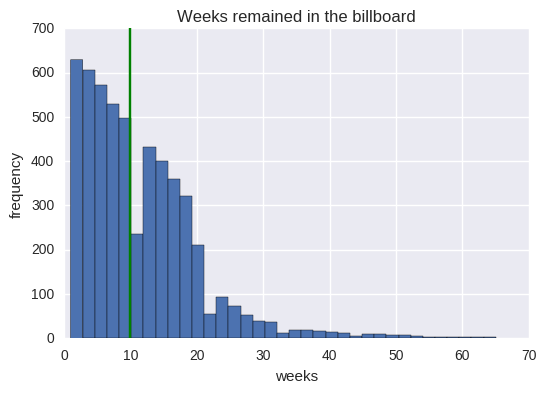

In [319]:
# How many days do song remain in the billboard
bb_melted.week.hist(bins=35)
plt.title("Weeks remained in the billboard")
#plt.axvline(np.mean(bb_melted.week),color="r")
plt.axvline(np.median(bb_melted.week),color="g")
plt.xlabel("weeks")
plt.ylabel("frequency")
plt.show()

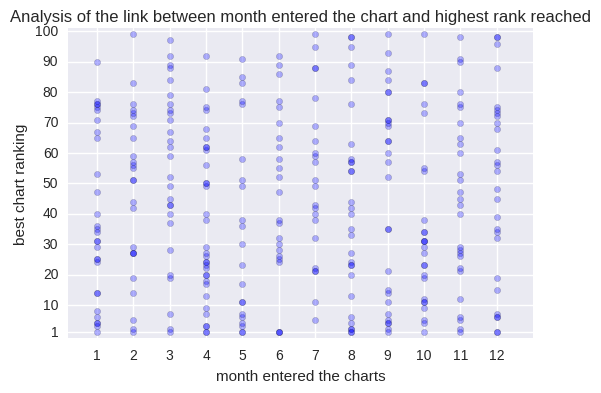

In [418]:
# Link between highest rank reached and month song entered charts
bb_melted['month.entered'] = bb_melted['entered'].dt.month
pivot2 = bb_melted.pivot_table(index=["track"],values=["month.entered","ranking"],aggfunc=min)
plt.scatter(pivot2["month.entered"],pivot2["ranking"],alpha=.3)
plt.xlabel("month entered the charts")
plt.xlim((0.2,13))
plt.xticks(list(range(1,13)))
plt.ylim((-1,101))
lyticks = list(np.arange(10,101,10))
lyticks.insert(0,1)
plt.yticks(lyticks)
plt.ylabel("best chart ranking")
plt.title("Analysis of the link between month entered the chart and highest rank reached")
plt.show()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

We wonder whether there is a link between the success achieved by a song and some of its "non musical" characteristics. In other words, we want to look at some of the song meta data, and see if it affects its commercial success.

For instance, does the song duration impact its performance? Or does the month it entered the chart impact it?

Also we may ask ourselves our long it takes for songs to reach their peak position, as well as how long they typically stay in the billboard once they have entered it.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

Here is the suggested approach to find some answers to the problem statement above:
* Obtain similar datasets for multiple years, ideally since the billboard was established
* For each year, study the distribution of the length of songs reaching #1 and plot yearly average it on a timeseries chart. On the same chart, plot the averate length of songs on the billboard. This will allow comparison of the #1 and all billboard average length for a given year, but also across years. If a pattern emerges, it could give an indication of the ideal song duration (for a given year) to reach the charts and even #1
* For each year, study the distribution of #1 per month entered the chart. If a pattern emerges, it would give an indication of what is the ideal month to enter the charts to reach #1
* For each year, study the average time remained in the billboards. It will give an indication of our the music industry has evolved over years (with potentially more songs/artists being produced in the recent years, and as a consequence higher turnover in the charts)

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

See [gregvial.github.io](https://gregvial.github.io)

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

See [gregvial.github.io](https://gregvial.github.io)